In [2]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [15]:
#features
X = rawData.iloc[:,2:24]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,female,university,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,female,university,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,female,university,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,female,university,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,male,university,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [16]:
#dependent variable
y = rawData['LIMIT_BAL']

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(n_jobs=10)

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
print(cross_val_score(model, X, y, cv=3))

[nan nan nan]


C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'female'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'female'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float:

In [23]:
algosClass = []

In [24]:
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))

In [26]:
algosClass.append(('Linear Regression', LinearRegression()))

In [27]:
algosClass.append(('Support Vector Regression', SVR()))

In [30]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'female'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'female'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\guerr\Anaconda3\envs\dataScience\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float:

In [31]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor nan
Linear Regression nan
Support Vector Regression nan


In [32]:
#need to make the data into numbers for python. Probably through one hot encoding.

In [34]:
rawData2 = pd.get_dummies(rawData)

In [35]:
rawData2.dtypes

ID                                        int64
LIMIT_BAL                                 int64
MARRIAGE                                  int64
AGE                                       int64
PAY_0                                     int64
PAY_2                                     int64
PAY_3                                     int64
PAY_4                                     int64
PAY_5                                     int64
PAY_6                                     int64
BILL_AMT1                                 int64
BILL_AMT2                                 int64
BILL_AMT3                                 int64
BILL_AMT4                                 int64
BILL_AMT5                                 int64
BILL_AMT6                                 int64
PAY_AMT1                                  int64
PAY_AMT2                                  int64
PAY_AMT3                                  int64
PAY_AMT4                                  int64
PAY_AMT5                                

In [36]:
#features
X = rawData2.iloc[:,2:29]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [37]:
#dependent variable
y = rawData2['LIMIT_BAL']

In [38]:
print(cross_val_score(model, X, y, cv=3))

[-0.03368311 -0.00461786 -0.11283932]


In [39]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [40]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.4684938374258749
Linear Regression 0.35819894266101854
Support Vector Regression -0.050380094472762


In [42]:
algo = RandomForestRegressor()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(rawData2, y, test_size=0.2)

In [44]:
model = algo.fit(X_train,y_train)

In [46]:
predictions = model.predict(X_test)

In [47]:
print(predictions)

[ 50000.  20000.  80000. ... 320000.  50000.  50000.]


In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 30) (24000,)
(6000, 30) (6000,)


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [51]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [52]:
predRsquared = r2_score(y_test, predictions)

In [53]:
print('R squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R squared: 1.000
RMSE: 179.127


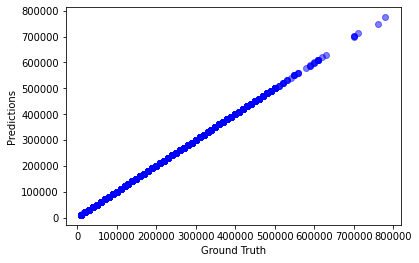

In [61]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [68]:
rawData2.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [71]:
rawData2.dtypes

ID                                        int64
LIMIT_BAL                                 int64
MARRIAGE                                  int64
AGE                                       int64
PAY_0                                     int64
PAY_2                                     int64
PAY_3                                     int64
PAY_4                                     int64
PAY_5                                     int64
PAY_6                                     int64
BILL_AMT1                                 int64
BILL_AMT2                                 int64
BILL_AMT3                                 int64
BILL_AMT4                                 int64
BILL_AMT5                                 int64
BILL_AMT6                                 int64
PAY_AMT1                                  int64
PAY_AMT2                                  int64
PAY_AMT3                                  int64
PAY_AMT4                                  int64
PAY_AMT5                                

In [72]:
rawData2.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
